### **Mobile Price Classification**

**Abstract**

We are looking for a correlation between the features of a mobile phone, such as RAM and internal memory, and its selling price. Instead of predicting the exact price, our goal is to determine a price range that indicates the general cost of the phone.

#   Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import codecs
import io
from statsmodels.graphics.gofplots import qqplot
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.evaluate import bias_variance_decomp

# Loading Datasets

In [ ]:
test = "https://raw.githubusercontent.com/kmehul/Info_6105_Datasets/main/Datasets/test.csv"
df_test = pd.read_csv(test)

In [ ]:
train = "https://raw.githubusercontent.com/kmehul/Info_6105_Datasets/main/Datasets/train.csv"
df_train = pd.read_csv(train)

In [ ]:
#Reading the data set.
df = df_train

#Viewing the data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Checking the data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The data is split into numeric and categorical data types, with 14 numeric type and 7 categorical type data.

Numeric: battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time

Categorical: blue, dual_sim, four-g, three-g, touch_screen, wifi, price_range

# Checking for missing values

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Thus, we can confirm that there are no missing values in the dataset.

# Checking the likely distributions of the numeric variables.

<Figure size 1152x1152 with 0 Axes>

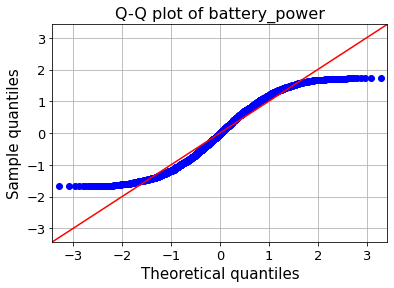

<Figure size 1152x1152 with 0 Axes>

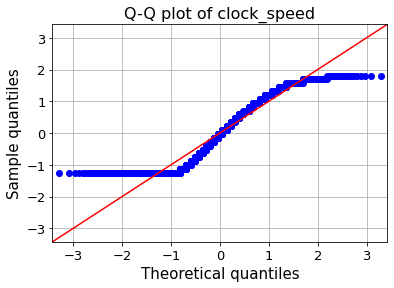

<Figure size 1152x1152 with 0 Axes>

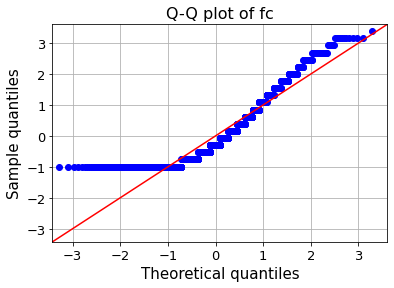

<Figure size 1152x1152 with 0 Axes>

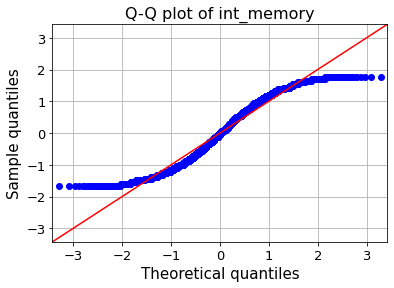

<Figure size 1152x1152 with 0 Axes>

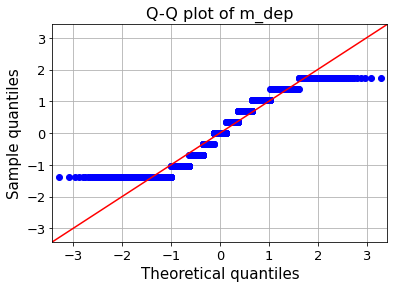

<Figure size 1152x1152 with 0 Axes>

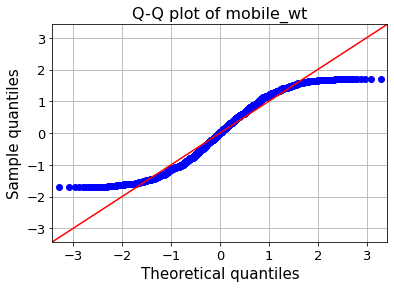

<Figure size 1152x1152 with 0 Axes>

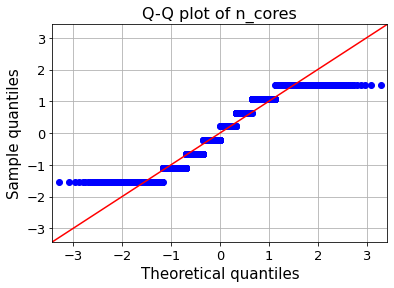

<Figure size 1152x1152 with 0 Axes>

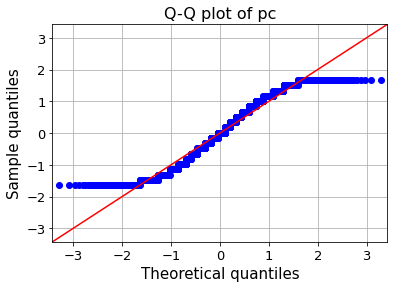

<Figure size 1152x1152 with 0 Axes>

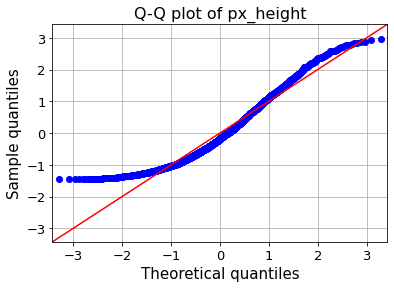

<Figure size 1152x1152 with 0 Axes>

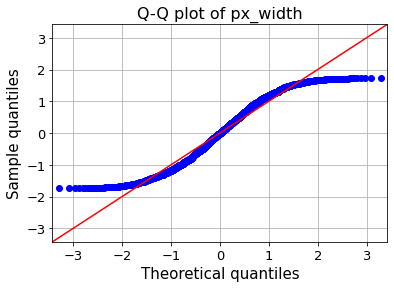

<Figure size 1152x1152 with 0 Axes>

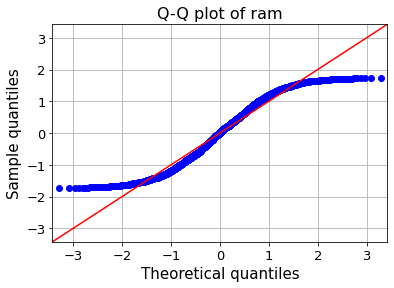

<Figure size 1152x1152 with 0 Axes>

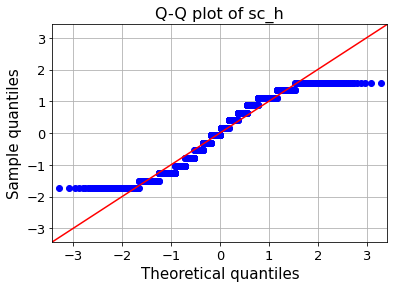

<Figure size 1152x1152 with 0 Axes>

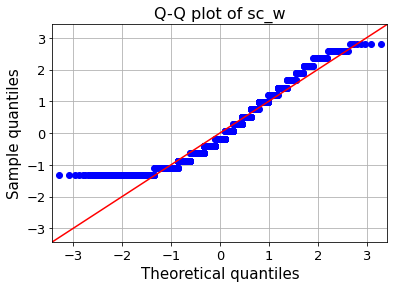

<Figure size 1152x1152 with 0 Axes>

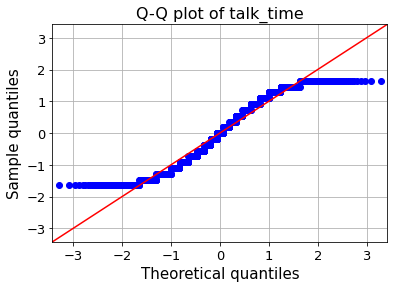

In [ ]:
#Creating a qq plot for the numeric variables to check their normal distribution.


data_norm=df_train[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 
                'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(16,16))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

As we can see from the above plots, the numeric variables are roughly following the normal distribution, which an exception of some outliers, like clock_speed ,and fc.

# Checking which independent variables are useful to predict a target/dependent variable

**Correlation Matrix**

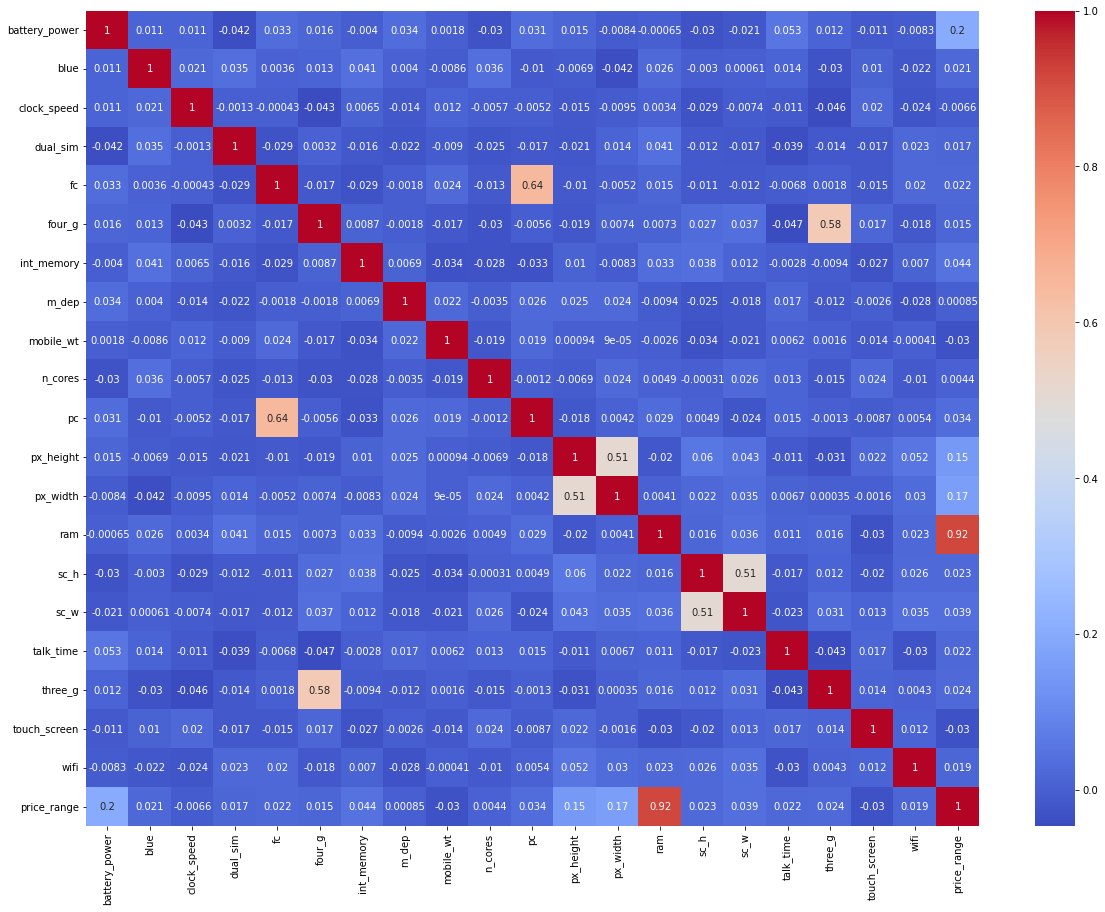

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_train.corr()
plt.figure(figsize =(20, 15))
# Plot the correlation matrix using Seaborn's heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Since price_range is the target variable in our dataset.
Looking at the above heatmap for the correlation matrix, we can say that ram is the most important independent variable that can be used to predict the target variable.

**Recursive Feature Selection using Decision Tree**

In [ ]:
# Split the dataset into X (features) and y (target)
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

# Apply RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)

# Create the model
model = DecisionTreeClassifier()
fit = rfe.fit(X, y)

# Print the results
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  1
Selected Features:  [False False False False False False False False False False False False
 False  True False False False False False False]
Feature Ranking:  [ 3 17  9 16 15 14  6 12  5 11  8  4  2  1 13  7 10 19 18 20]


Looking at the result of Recursive Feature Elimination using decision tree, we can say that ram is the most important variable to be used to predict the target variable.

**Random Forest**

In [ ]:
# Separate the target (dependent) variable
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

# Get the feature importances from the classifier
importances = clf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 13 (0.479762)
2. feature 0 (0.075640)
3. feature 12 (0.056920)
4. feature 11 (0.056710)
5. feature 8 (0.039629)
6. feature 6 (0.035723)
7. feature 16 (0.030314)
8. feature 2 (0.029414)
9. feature 10 (0.029307)
10. feature 14 (0.028000)
11. feature 15 (0.027885)
12. feature 9 (0.024208)
13. feature 7 (0.024065)
14. feature 4 (0.023834)
15. feature 18 (0.007247)
16. feature 1 (0.006904)
17. feature 3 (0.006745)
18. feature 5 (0.006348)
19. feature 19 (0.006243)
20. feature 17 (0.005103)


Looking at the above result, we can say that ram is the most important variable to be used to predict the target variable.

# Which independent variables have missing data? How much?

In [ ]:
missing = df_train.isnull().sum().sort_values(ascending = False)
missing = missing[missing > 0]
print(missing)

Series([], dtype: int64)


Looking at the result, we can say that no independent variables are missing any data.

# Do the training and test sets have the same data?

In [ ]:
random_train = df_train.iloc[:,:-1]

# Check the number of rows and columns
if df_train.shape[0] != df_test.shape[0] or random_train.shape[1] != df_test.shape[1]:
    print("Training and test sets have different number of rows or columns")

# Check the values of each column
for col in random_train.columns:
    if not (random_train[col].equals(df_test[col])):
        print("Column " + col + " has different values in training and test sets")

Training and test sets have different number of rows or columns
Column battery_power has different values in training and test sets
Column blue has different values in training and test sets
Column clock_speed has different values in training and test sets
Column dual_sim has different values in training and test sets
Column fc has different values in training and test sets
Column four_g has different values in training and test sets
Column int_memory has different values in training and test sets
Column m_dep has different values in training and test sets
Column mobile_wt has different values in training and test sets
Column n_cores has different values in training and test sets
Column pc has different values in training and test sets
Column px_height has different values in training and test sets
Column px_width has different values in training and test sets
Column ram has different values in training and test sets
Column sc_h has different values in training and test sets
Column sc_

Thus, we can say that the train and the test sets do not have the same data.

# In the predictor variables independent of all the other predictor variables?



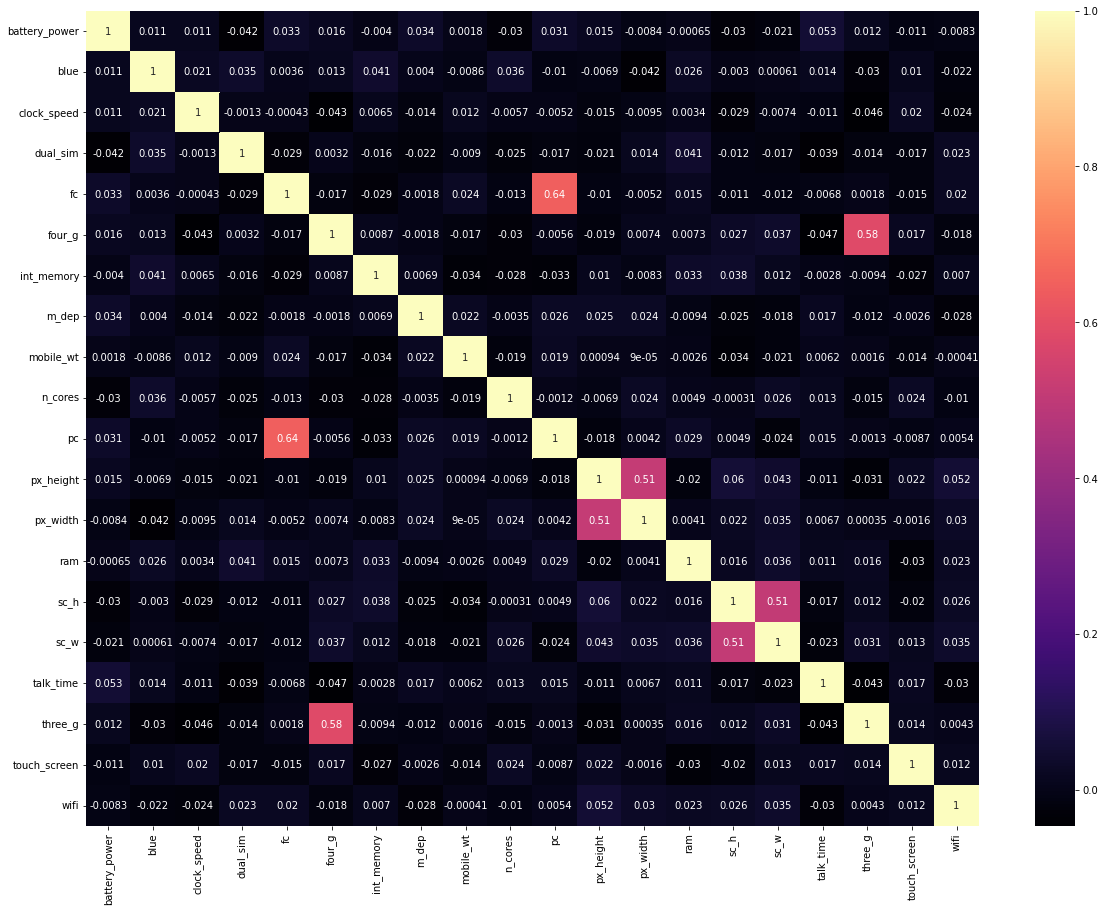

In [ ]:
X = df_train.iloc[:,:-1]
# Calculate the correlation matrix
corr_matrix = X.corr()
plt.figure(figsize =(20, 15))
# Plot the correlation matrix using Seaborn's heatmap
sns.heatmap(corr_matrix, annot=True, cmap='magma')

Looking at the above result, it can be said that "fc and pc", "four_g and three_g", "px_height and px_width", and "sc_h and sc_w" are somewhat interdependent on each other.

# Which predictor variables are the most important?

**Using Recursive Feature Selection**

In [ ]:
# Split the dataset into X (features) and y (target)
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

# Apply RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)

# Create the model
model = DecisionTreeClassifier()
fit = rfe.fit(X, y)

# Print the results
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  1
Selected Features:  [False False False False False False False False False False False False
 False  True False False False False False False]
Feature Ranking:  [ 3 15 10 13 16 18  6 14  5  9  7  4  2  1  8 11 12 17 20 19]


Thus, it can be said that ram is the most important predictor variable.

# Do the ranges of the predictor variables make sense?

Normalizing the predictor variable values.

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_train)

data_scaled = pd.DataFrame(data_scaled, columns=df_train.columns)

Using histogram to depict all predictor variable values.

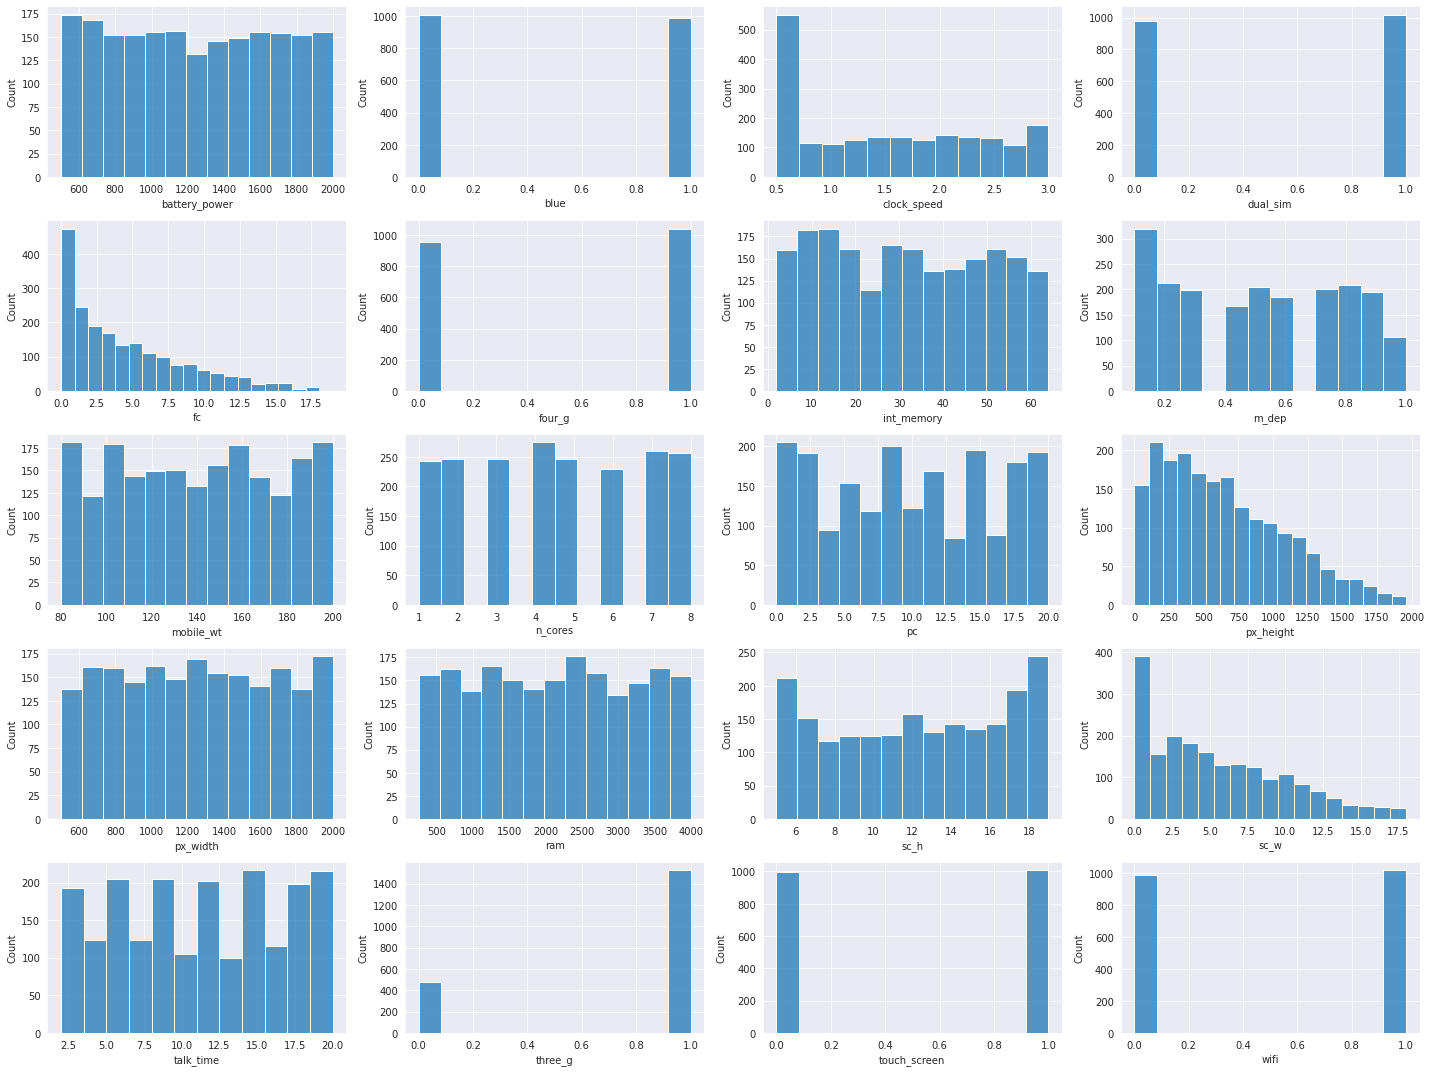

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,15))
for i in range(1, df_train.shape[1]):
    plt.subplot(5,4,i)
    sns.histplot(df_train[df_train.columns[i-1]], kde=False)
plt.tight_layout()

In the histogram above, we can see that most of the variables are normally distributed, with the exception of presence of outliers in clock_speed, m_dep, fc and sc_w, with fc, px_height and sc_w showing the trend of values grouping in the lower range. So yes, the ranges of most predictor variables makes sense.

# Dsitribution of the predictor variables.

In the histogram above, we can see that most of the variables are normally distributed, with the exception of presence of outliers in clock_speed, m_dep, fc and sc_w, with fc, px_height and sc_w showing the trend of values grouping in the lower range.

# Outliers

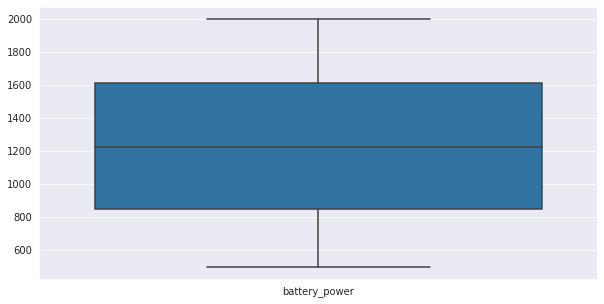

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['battery_power']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

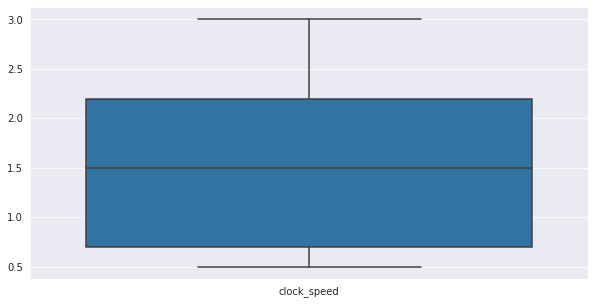

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['clock_speed']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

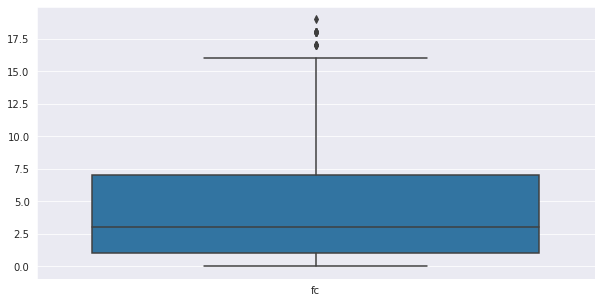

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['fc']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

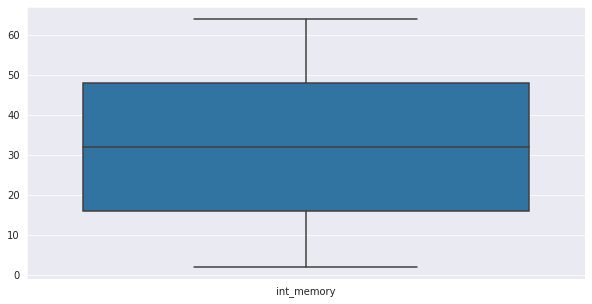

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['int_memory']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

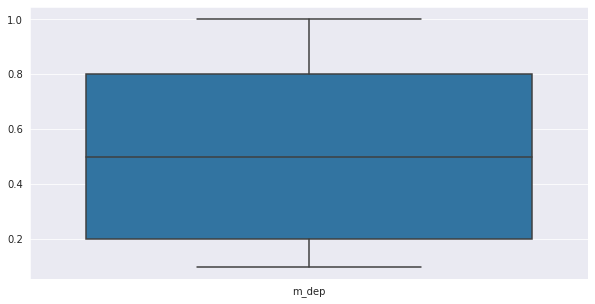

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['m_dep']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

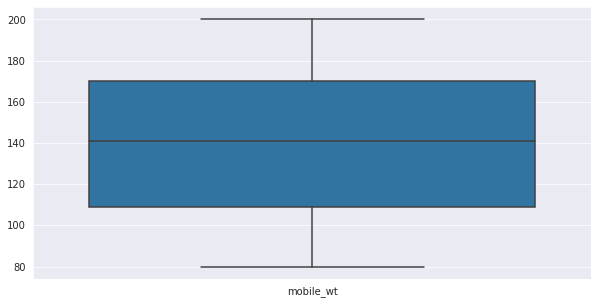

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['mobile_wt']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

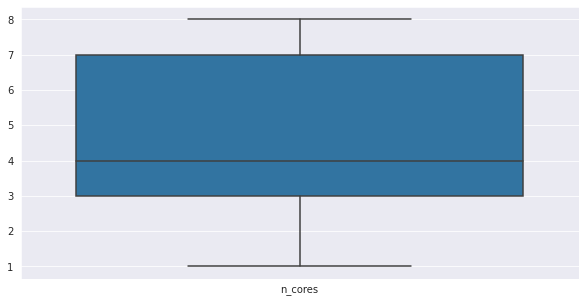

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['n_cores']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

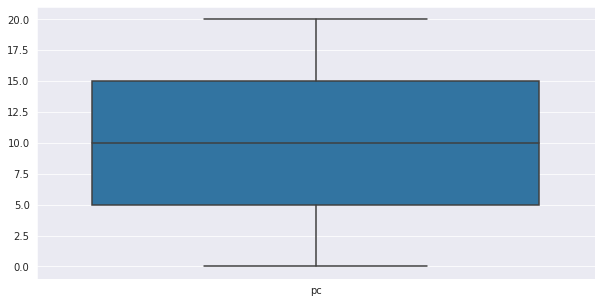

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['pc']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

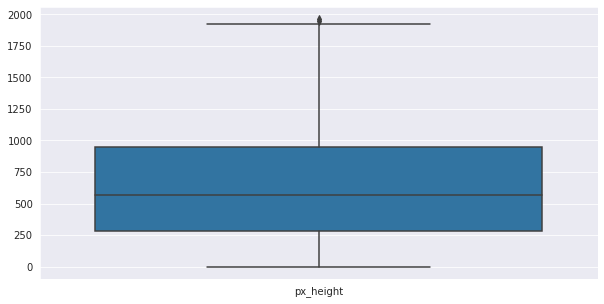

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['px_height']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

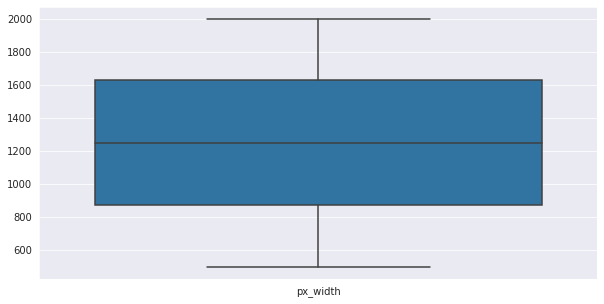

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['px_width']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

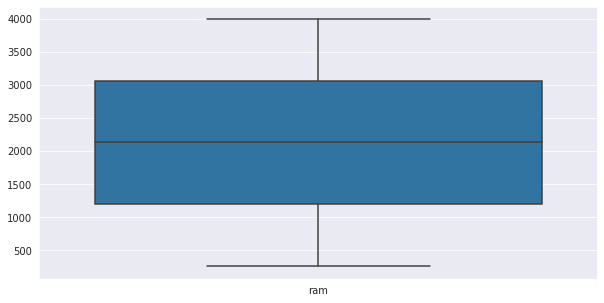

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['ram']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

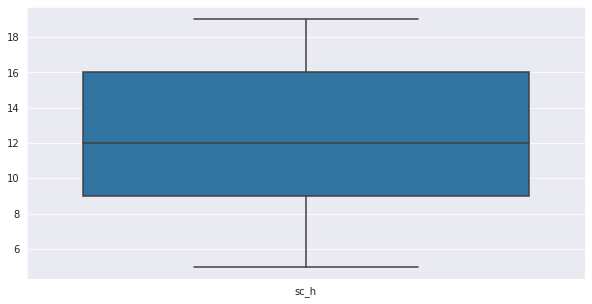

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['sc_h']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

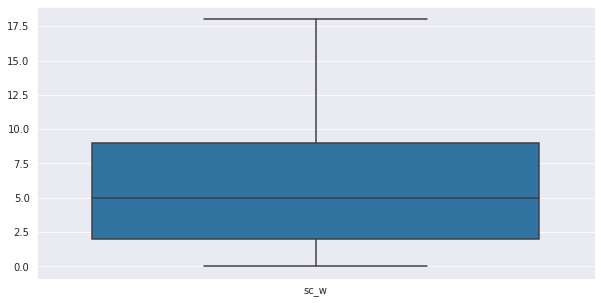

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['sc_w']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

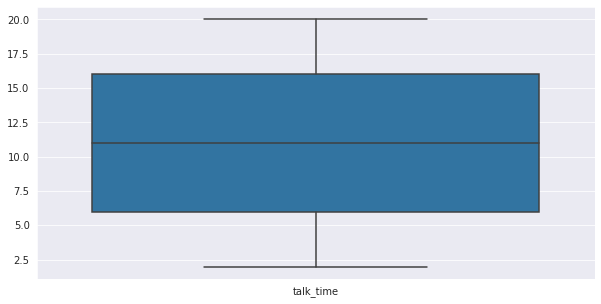

In [ ]:
# Select the specific columns for which you want to create the box plots
columns = ['talk_time']
data = df_train[columns]

# Create the box plots
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

In the above box plots, we can see that only fc and px_height have outliers

Removing outliers from fc and px_height, and evaluating its effect on the final predictive model.

In [ ]:
df_out = df.copy();

Removal of fc outliers

In [ ]:
# Position of the Outlier
print(np.where(df_out['fc']>16.0))

#IQR-Inter Quartile Range
Q1 = np.percentile(df_out['fc'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_out['fc'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Shape Before removing Outliers: ", df_out.shape)

(array([  95,  169,  226,  229,  300,  305,  372,  584, 1387, 1406, 1416,
       1549, 1554, 1693, 1705, 1880, 1882, 1888]),)
Shape Before removing Outliers:  (2000, 21)


In [ ]:
#upper bound
upper = np.where(df_out['fc'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_out['fc'] <= (Q1-1.5*IQR))

#Removing Outliers from CCAvg
df_out.drop(upper[0], inplace = True)
df_out.drop(lower[0], inplace = True)
 
print("After Removal of outliers: ", df_out.shape)

After Removal of outliers:  (1958, 21)


Removal of px_height outliers

In [ ]:
# Position of the Outlier
print(np.where(df_out['px_height']>1950))

#IQR-Inter Quartile Range
Q1 = np.percentile(df_out['px_height'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_out['px_height'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Shape Before removing Outliers: ", df_out.shape)

(array([1733]),)
Shape Before removing Outliers:  (1958, 21)


In [ ]:
#upper bound
upper = np.where(df_out['px_height'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_out['px_height'] <= (Q1-1.5*IQR))

#Removing Outliers from CCAvg
df_out.drop(upper[0], inplace = True)
df_out.drop(lower[0], inplace = True)
 
print("After Removal of outliers: ", df_out.shape)

After Removal of outliers:  (1956, 21)


In [ ]:
X1 = df_out.drop(['price_range'], axis =1)
y1 = df_out['price_range']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=30)

In [ ]:
# Impute missing values with the mean value
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)


In [ ]:
# Fit a random forest classifier to the training data
clf = RandomForestClassifier(random_state=0)
clf.fit(X1_train, y1_train)

# Make predictions on the test data
y_pred = clf.predict(X1_test)

In [ ]:
# Make predictions using the training set
y_pred = clf.predict(X1_train)
# The mean squared error
print('Root Mean squared error: %.2f'% math.sqrt(mean_squared_error(y1_train, y_pred)))

r2 = r2_score(y1_train,y_pred)
print('R^2 score on tarining set =',r2)

Root Mean squared error: 0.00
R^2 score on tarining set = 1.0


It seems that since the error is 0, the model is perfect, and might have been overfit.

In [ ]:
# Make predictions using the testing set
y_pred = clf.predict(X1_test)
# The mean squared error
print('Mean squared error: %.2f'% math.sqrt(mean_squared_error(y1_test, y_pred)))

r2 = r2_score(y1_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.36
R^2 score on test set = 0.8949833481655458


Removal of the outliers did have a considerable effect on the final predictive model.

# Removal and Imputation of Data

**Removing 1% Data**

In [ ]:
df_copy = df.copy()

#removing 1% data from column 
df_one = df_copy['battery_power'].sample(frac = 0.01)

df_copy['battery_power'].loc[df_copy.index.isin(df_one.index)]=np.NaN

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Count of null values

In [ ]:
df_copy['battery_power'].isnull().sum()

20

Data Entry using Mode Imputation

In [ ]:
df_copy['battery_power'] = df_copy['battery_power'].fillna(df_copy['battery_power'].mode())

In [ ]:
df_copy = df_copy.apply(LabelEncoder().fit_transform)
df_copy

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,255,0,17,0,1,0,5,5,108,1,...,18,186,963,4,7,17,0,0,1,1
1,382,1,0,1,0,1,51,6,56,2,...,738,1099,998,12,3,5,1,1,0,2
2,48,1,0,1,2,1,39,8,65,4,...,962,901,984,6,2,7,1,1,0,2
3,88,1,20,0,0,0,8,7,51,5,...,935,954,1055,11,8,9,1,0,0,2
4,950,1,7,0,13,1,42,5,61,1,...,928,517,499,3,2,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,216,1,0,1,0,1,0,7,26,5,...,939,1022,180,8,4,17,1,1,0,0
1996,1060,1,21,1,0,0,37,1,107,3,...,745,1080,732,6,10,14,1,1,1,2
1997,1023,0,4,1,1,1,34,6,28,7,...,716,834,1158,4,1,3,1,1,0,3
1998,728,0,4,0,4,1,44,0,65,4,...,283,120,266,13,10,17,1,1,1,0


In [ ]:
X1 = df_copy.drop(['price_range'], axis =1)
y1 = df_copy['price_range']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=30)

In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X1_train, y1_train)
y_pred = clf.predict(X1_test)

In [ ]:
# Make predictions using the training set
y_pred = clf.predict(X1_train)
# The mean squared error
print('Root Mean squared error: %.2f'% math.sqrt(mean_squared_error(y1_train, y_pred)))

r2 = r2_score(y1_train,y_pred)
print('R^2 score on tarining set =',r2)

Root Mean squared error: 0.00
R^2 score on tarining set = 1.0


In [ ]:
# Make predictions using the testing set
y_pred = clf.predict(X1_test)
# The mean squared error
print('Mean squared error: %.2f'% math.sqrt(mean_squared_error(y1_test, y_pred)))

r2 = r2_score(y1_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.37
R^2 score on test set = 0.890783485936729


In [ ]:
loss_1, bias_1, var_1 = bias_variance_decomp(clf, X1_train.values, y1_train.values, X1_test.values, y1_test.values, loss='0-1_loss', num_rounds=200, random_seed=1)
# summarize results
print('Loss: %.3f' % loss_1)
print('Bias: %.3f' % bias_1)
print('Variance: %.3f' % var_1)

Loss: 0.151
Bias: 0.137
Variance: 0.066


**Removing 5% data**

In [ ]:
df_copy = df.copy()

X1 = df_copy.drop(['price_range'], axis =1)
y1 = df_copy['price_range']

#removing 5% data from column 
df_five = df_copy['battery_power'].sample(frac = 0.05)

df_copy['battery_power'].loc[df_copy.index.isin(df_five.index)]=np.NaN

Count of Null values

In [ ]:
df_copy['battery_power'].isnull().sum()

100

Data Entry using Median Imputation

In [ ]:
df_copy['battery_power'] = df_copy['battery_power'].fillna(df_copy['battery_power'].median())

In [ ]:
df_copy = df_copy.apply(LabelEncoder().fit_transform)
df_copy

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,252,0,17,0,1,0,5,5,108,1,...,18,186,963,4,7,17,0,0,1,1
1,377,1,0,1,0,1,51,6,56,2,...,738,1099,998,12,3,5,1,1,0,2
2,48,1,0,1,2,1,39,8,65,4,...,962,901,984,6,2,7,1,1,0,2
3,87,1,20,0,0,0,8,7,51,5,...,935,954,1055,11,8,9,1,0,0,2
4,938,1,7,0,13,1,42,5,61,1,...,928,517,499,3,2,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,214,1,0,1,0,1,0,7,26,5,...,939,1022,180,8,4,17,1,1,0,0
1996,1045,1,21,1,0,0,37,1,107,3,...,745,1080,732,6,10,14,1,1,1,2
1997,1009,0,4,1,1,1,34,6,28,7,...,716,834,1158,4,1,3,1,1,0,3
1998,721,0,4,0,4,1,44,0,65,4,...,283,120,266,13,10,17,1,1,1,0


In [ ]:
X1 = df_copy.drop(['price_range'], axis =1)
y1 = df_copy['price_range']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=30)

In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X1_train, y1_train)
y_pred = clf.predict(X1_test)

In [ ]:
# Make predictions using the training set
y_pred = clf.predict(X1_train)
# The mean squared error
print('Root Mean squared error: %.2f'% math.sqrt(mean_squared_error(y1_train, y_pred)))

r2 = r2_score(y1_train,y_pred)
print('R^2 score on tarining set =',r2)

Root Mean squared error: 0.00
R^2 score on tarining set = 1.0


In [ ]:
# Make predictions using the testing set
y_pred = clf.predict(X1_test)
# The mean squared error
print('Mean squared error: %.2f'% math.sqrt(mean_squared_error(y1_test, y_pred)))

r2 = r2_score(y1_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.37
R^2 score on test set = 0.890783485936729


In [ ]:
loss_5, bias_5, var_5 = bias_variance_decomp(clf, X1_train.values, y1_train.values, X1_test.values, y1_test.values, loss='0-1_loss', num_rounds=200, random_seed=1)

# summarize results
print('Loss: %.3f' % loss_5)
print('Bias: %.3f' % bias_5)
print('Variance: %.3f' % var_5)

Loss: 0.152
Bias: 0.138
Variance: 0.065


**Removing 10% Data**

In [ ]:
df_copy = df.copy()

#removing 10% data from column 
df_ten = df_copy['battery_power'].sample(frac = 0.1)

df_copy['battery_power'].loc[df_copy.index.isin(df_ten.index)]=np.NaN

Count of Null Values

In [ ]:
df_copy['battery_power'].isnull().sum()

200

Data Entry using Mean Imputation

In [ ]:
df_copy['battery_power'] = df_copy['battery_power'].fillna(df_copy['battery_power'].mean())

In [ ]:
df_copy = df_copy.apply(LabelEncoder().fit_transform)
df_copy

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,247,0,17,0,1,0,5,5,108,1,...,18,186,963,4,7,17,0,0,1,1
1,369,1,0,1,0,1,51,6,56,2,...,738,1099,998,12,3,5,1,1,0,2
2,46,1,0,1,2,1,39,8,65,4,...,962,901,984,6,2,7,1,1,0,2
3,520,1,20,0,0,0,8,7,51,5,...,935,954,1055,11,8,9,1,0,0,2
4,915,1,7,0,13,1,42,5,61,1,...,928,517,499,3,2,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,210,1,0,1,0,1,0,7,26,5,...,939,1022,180,8,4,17,1,1,0,0
1996,1019,1,21,1,0,0,37,1,107,3,...,745,1080,732,6,10,14,1,1,1,2
1997,520,0,4,1,1,1,34,6,28,7,...,716,834,1158,4,1,3,1,1,0,3
1998,698,0,4,0,4,1,44,0,65,4,...,283,120,266,13,10,17,1,1,1,0


In [ ]:
X1 = df_copy.drop(['price_range'], axis =1)
y1 = df_copy['price_range']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=30)

In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X1_train, y1_train)
y_pred = clf.predict(X1_test)

In [ ]:
# Make predictions using the training set
y_pred = clf.predict(X1_train)
# The mean squared error
print('Root Mean squared error: %.2f'% math.sqrt(mean_squared_error(y1_train, y_pred)))

r2 = r2_score(y1_train,y_pred)
print('R^2 score on tarining set =',r2)

Root Mean squared error: 0.00
R^2 score on tarining set = 1.0


In [ ]:
# Make predictions using the testing set
y_pred = clf.predict(X1_test)
# The mean squared error
print('Mean squared error: %.2f'% math.sqrt(mean_squared_error(y1_test, y_pred)))

r2 = r2_score(y1_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.40
R^2 score on test set = 0.8763090081693076


In [ ]:
loss_10, bias_10, var_10 = bias_variance_decomp(clf, X1_train.values, y1_train.values, X1_test.values, y1_test.values, loss='0-1_loss', num_rounds=200, random_seed=1)

# summarize results
print('Loss: %.3f' % loss_10)
print('Bias: %.3f' % bias_10)
print('Variance: %.3f' % var_10)

Loss: 0.163
Bias: 0.148
Variance: 0.064


Looking at the loss, bias and the variance after removal and imputation of 1%, 5%, 10% data, we can see that there is not a significant affect on the model, as the r-squared value remains close to 1, and loss, bias and variance are very close to zero. So we can say that the imputation methods did a good job at recovering the missing data.

# Accuracy and a confusion matrix for Categorical Data

Accuracy

In [ ]:
# Select specific columns to use for prediction
selected_columns = ['blue', 'dual_sim', 'four_g','three_g','touch_screen','wifi']
df_selected = df[selected_columns]

# Split data into training and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(
    df_selected, df['price_range'], test_size=0.3, random_state=0)

# Train a Logistic Regression model
clf = LogisticRegression()
clf.fit(X1_train, y1_train)

# Predict the target values for test data
y_pred = clf.predict(X1_test)

# Calculate accuracy
accuracy = accuracy_score(y1_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.23


Confusion Matrix

In [ ]:
# Select the specific columns you want to calculate the confusion matrix for
columns = ['blue', 'dual_sim', 'four_g','three_g','touch_screen','wifi']
df = df[columns]

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=0)

# Train a classifier on the training data
clf = LogisticRegression()
clf.fit(X1_train, y1_train)

# Make predictions on the testing data
y_pred = clf.predict(X1_test)

# Calculate the confusion matrix
cm = confusion_matrix(y1_test, y_pred)

# Print the confusion matrix
print(cm)

[[ 80 126]
 [ 85 109]]


# References

*   https://medium.com/machine-learner/independent-and-dependent-variables-1-10d8553ad616
*   https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0
*   https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
*   https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Wine_Quality.ipynb
*   https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb




All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright(c) 2023 Kumar Mehul

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.